# **Importing dependencies**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Image Processing

**Convert images to numpy arrays**

Done in traing in Extracting train notebook

Exporting the process image of numpyarray in data from extracting-train notebook

In [2]:
# Load the data
loaded_data = np.load('/kaggle/input/extracting-train/training_data.npz')

# Access the NumPy array
data = loaded_data['data']

# **Analyzing the train set**

In [3]:
image_count = data.shape[0]
print('Number of images: ', image_count)

Number of images:  50000


**Displaying the images**

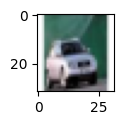

In [4]:
#display an image
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

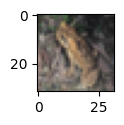

In [5]:
#display an image
img = data[10012]
plt.figure(figsize=(2,1))
plt.imshow(img)

# **Labels Processing**

In [6]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [7]:
labels_df.shape

(50000, 2)

In [8]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [10]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [11]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Labels are marked serially by id and evenly distributed ( below )

In [12]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [14]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [15]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [16]:
len(labels)

50000

Checking labels correctness:

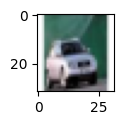

In [17]:
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

In [18]:
labels_df[labels_df['id'] == 9999]

,id,label
9998,9999,automobile


In [19]:
labels[9998] # automobile = 1 , and 0 base indexing in List

1

In [20]:
id_list = list(labels_df['id'])

In [21]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Train Test Split**

In [22]:
type(data)

numpy.ndarray

In [23]:
len(data)

50000

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(32, 32, 3)

In [26]:
# convert image list and label list to numpy arrays

x = data
y = np.array(labels)

In [27]:
type(x)

numpy.ndarray

In [28]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [29]:
#small data for testing while naking the model
# x = x[:100]
# y = y[:100]

In [30]:
x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [33]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [34]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

# Building the neural network using Resnet50

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

Resnet: https://keras.io/api/applications/resnet/

In [37]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 [==============================] - 4s 0us/step


In [38]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [39]:
num_of_classes = 10

model = models.Sequential() 
model.add(layers.UpSampling2D((2,2))) # 32 * 2 = 64
model.add(layers.UpSampling2D((2,2))) # 64 * 2 = 128
model.add(layers.UpSampling2D((2,2))) # 128 * 2 = 256

model.add(convolutional_base)

model.add(layers.Flatten())  # transforms the input into a one-dimensional array (flattens it) without modifying the actual data. 

model.add(layers.BatchNormalization()) #normalization
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5)) #droping or making somen neuron inactive to avoid overfitting

model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))


# Metrics and model compilation

In [40]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model train

In [41]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs= 10, batch_size=100)

Epoch 1/10
360/360 [==============================] - 252s 591ms/step - loss: 0.9336 - accuracy: 0.6948 - val_loss: 2.8099 - val_accuracy: 0.0980
Epoch 2/10
360/360 [==============================] - 211s 587ms/step - loss: 0.4589 - accuracy: 0.8506 - val_loss: 2.1221 - val_accuracy: 0.2715
Epoch 3/10
360/360 [==============================] - 211s 587ms/step - loss: 0.2972 - accuracy: 0.9034 - val_loss: 0.5918 - val_accuracy: 0.7980
Epoch 4/10
360/360 [==============================] - 211s 587ms/step - loss: 0.1968 - accuracy: 0.9364 - val_loss: 0.5138 - val_accuracy: 0.8438
Epoch 5/10
360/360 [==============================] - 211s 587ms/step - loss: 0.1360 - accuracy: 0.9547 - val_loss: 0.6454 - val_accuracy: 0.8225
Epoch 6/10
360/360 [==============================] - 211s 587ms/step - loss: 0.1103 - accuracy: 0.9647 - val_loss: 0.5535 - val_accuracy: 0.8425
Epoch 7/10
360/360 [==============================] - 211s 587ms/step - loss: 0.0834 - accuracy: 0.9730 - val_loss: 0.5606 -

# Model Evaluation with different metrics and plot

In [42]:
 from sklearn.metrics import f1_score

In [43]:
y_pred = model.predict(x_test_scaled)


313/313 [==============================] - 22s 63ms/step


In [44]:
y_pred_labels = y_pred.argmax(1)
# y_pred_labels = [np.argmax(i) for i in y_pred]

In [45]:
f1_score(y_test, y_pred_labels, average="macro")

0.862979042812217

In [46]:
loss, accuracy  = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 21s 65ms/step - loss: 0.5468 - accuracy: 0.8624
Test Accuracy = 0.8623999953269958


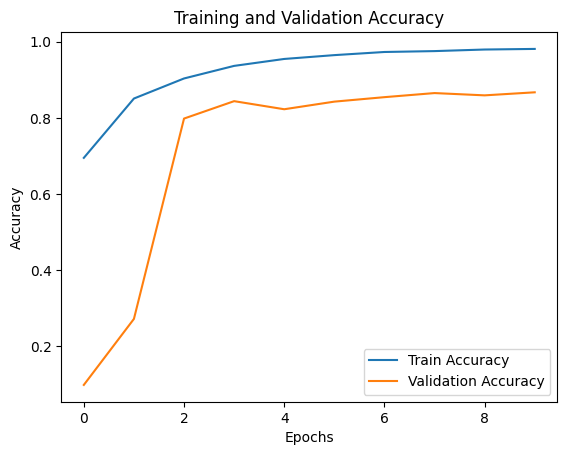

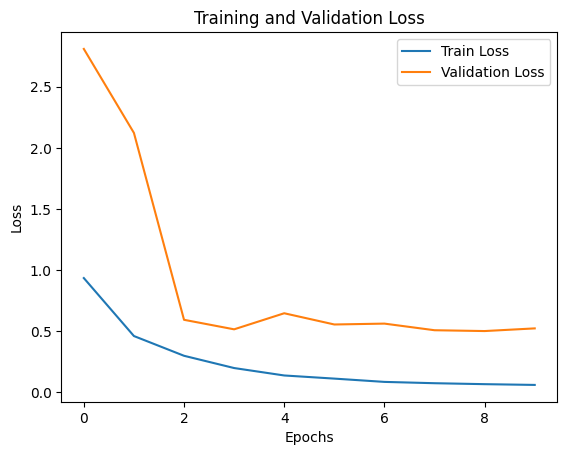

In [47]:

# Extract the metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot accuracy
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

**Confusion Matrix**

In [48]:
import seaborn as sns
from tensorflow.math import confusion_matrix

In [49]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [50]:
print(conf_mat)

tf.Tensor(
[[955   4  24   4   4   3   1   5  25   4]
 [ 15 935   1   1   0   1   1   1  19  22]
 [ 46   2 869  33  13  33  10  10  14   1]
 [ 16   4  34 708  20 154  17  14  13   2]
 [  8   1  41  33 850  34   8  24   9   0]
 [  6   2  26 102  16 810   7  25   4   0]
 [ 10   5  34  29  27  31 843   4  10   1]
 [  9   2  16  30  27  37   0 873   4   0]
 [ 32   2   3   8   1   4   0   2 931   6]
 [ 31  49   3  10   3   7   1   7  14 850]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

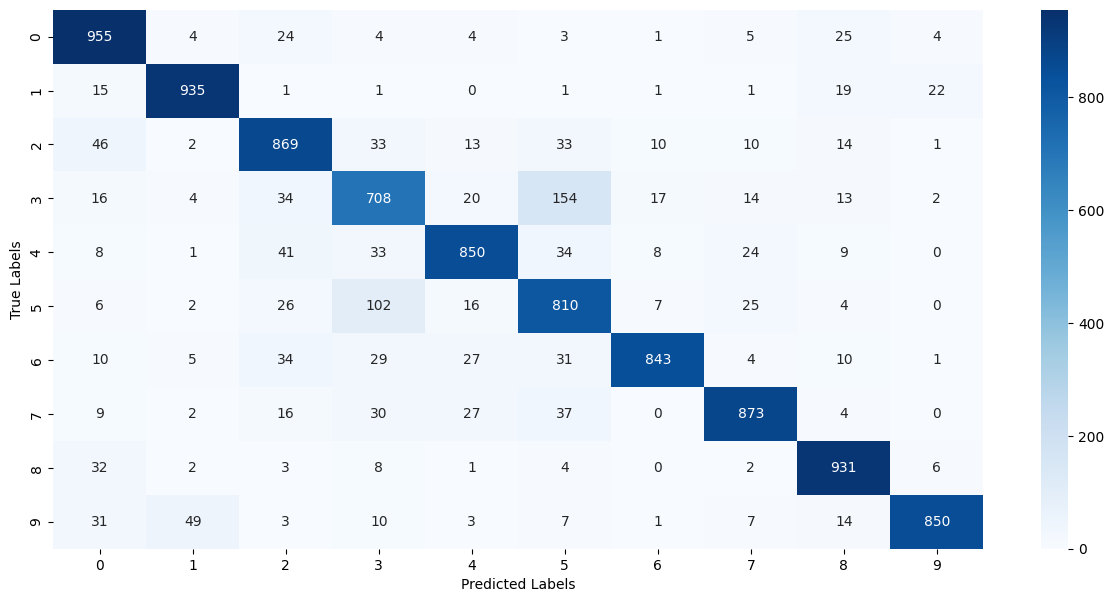

In [51]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Saving the model

In [52]:

model.save('/kaggle/working/CIFAR_resnet_model.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
